In [1]:
%matplotlib inline

from sklearn.datasets import make_blobs, make_classification
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np

plt.style.use('ggplot')
seed = 13

Let's generate some example data for a simple classification problem.

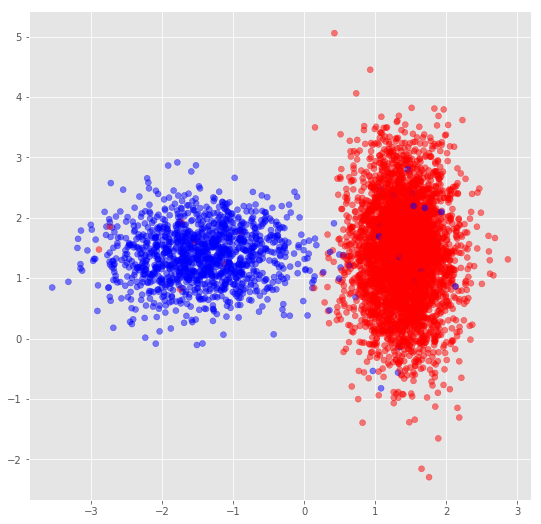

In [2]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, weights=[0.25,0.75],
                           hypercube=True, class_sep=1.4, random_state=seed)

plt.figure(figsize=(9,9))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.5)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

acc = []
for i in tqdm(range(10000)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=i)
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc.append(np.mean(y_test == y_pred))
acc = np.array(acc)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:28<00:00, 346.66it/s]


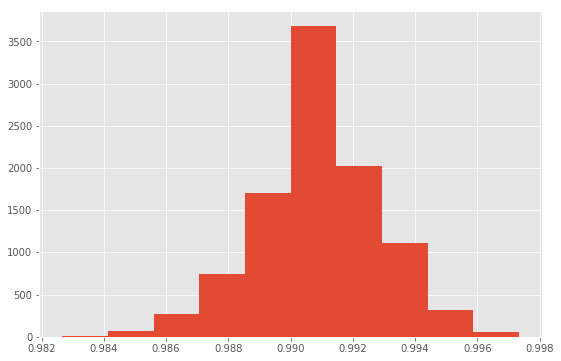

In [4]:
plt.figure(figsize=(9,6))
plt.hist(acc)
plt.show()

Label noise _completely at random_ (NCAR).

In [5]:
idx = np.random.uniform(size=y.shape) > 0.95

In [6]:
y_ncar = np.copy(y)
y_ncar[idx] = np.logical_not(y_ncar[idx]).astype(int)

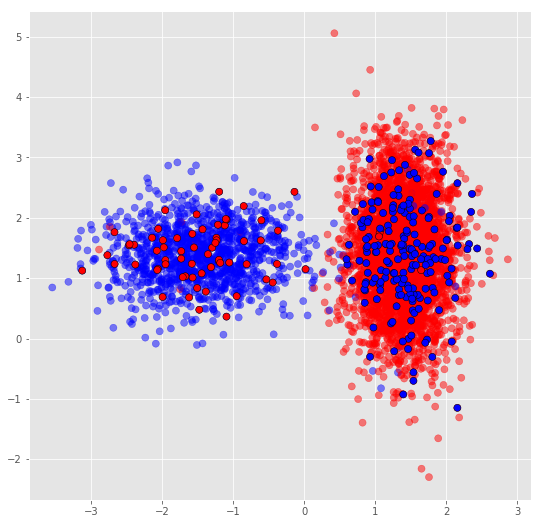

In [7]:
plt.figure(figsize=(9,9))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.5, s=50)
plt.scatter(X[idx,0], X[idx,1], c=y_ncar[idx], cmap='bwr', s=50, edgecolors='black')
plt.show()

In [8]:
acc_ncar, acc_ncar_true = [], []
threshold = 0.95
for i in tqdm(range(10000)):
    # Generate random labels
    y_ncar = np.copy(y)
    idx = np.random.uniform(size=y.shape) > threshold
    y_ncar[idx] = np.logical_not(y_ncar[idx]).astype(int)
    # Random train/test split
    idx_train, idx_test = train_test_split(np.arange(y.shape[0]), test_size=0.3, stratify=y_ncar, random_state=i)
    # Train model
    clf = LogisticRegression().fit(X[idx_train], y_ncar[idx_train])
    # Generate predictions and calculate performance
    y_pred = clf.predict(X[idx_test])
    acc_ncar.append(np.mean(y_ncar[idx_test] == y_pred))
    acc_ncar_true.append(np.mean(y[idx_test] == y_pred))
acc_ncar = np.array(acc_ncar)
acc_ncar_true = np.array(acc_ncar_true)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:27<00:00, 364.98it/s]


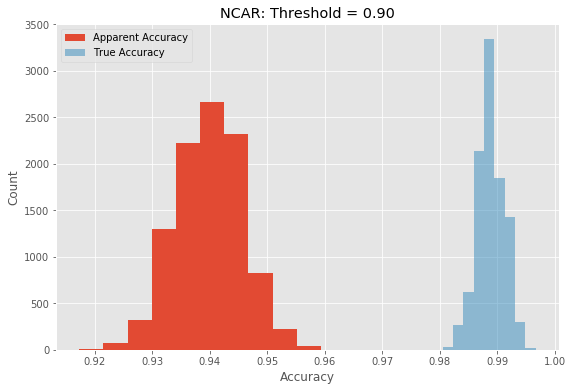

In [64]:
plt.figure(figsize=(9,6))
plt.hist(acc_ncar, label='Apparent Accuracy')
plt.hist(acc_ncar_true, label='True Accuracy', alpha=0.5)
plt.title('NCAR: Threshold = %0.2f' % threshold)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

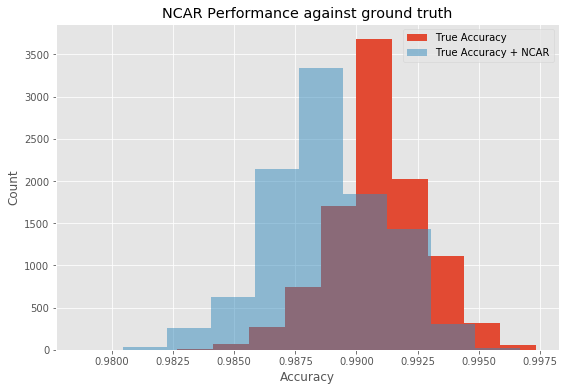

In [65]:
plt.figure(figsize=(9,6))
plt.hist(acc, label='True Accuracy')
plt.hist(acc_ncar_true, label='True Accuracy + NCAR', alpha=0.5)
plt.title('NCAR Performance against ground truth')
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

Try different thresholds.

In [91]:
accs_ncar = []
accs_ncar_true = []
thresholds = [0.8, 0.9, 0.95, 0.98, 0.99]
for threshold in thresholds:
    print('Threshold = %0.2f' % threshold)
    acc_ncar, acc_ncar_true = [], []
    for i in tqdm(range(10000)):
        # Generate random labels
        y_ncar = np.copy(y)
        idx = np.random.uniform(size=y.shape) > threshold
        y_ncar[idx] = np.logical_not(y_ncar[idx]).astype(int)
        # Random train/test split
        idx_train, idx_test = train_test_split(np.arange(y.shape[0]), test_size=0.3, stratify=y_ncar, random_state=i)
        # Train model
        clf = LogisticRegression().fit(X[idx_train], y_ncar[idx_train])
        # Generate predictions and calculate performance
        y_pred = clf.predict(X[idx_test])
        acc_ncar.append(np.mean(y_ncar[idx_test] == y_pred))
        acc_ncar_true.append(np.mean(y[idx_test] == y_pred))
    accs_ncar.append(np.percentile(acc_ncar, [2.5, 50, 97.5]))
    accs_ncar_true.append(np.percentile(acc_ncar_true, [2.5, 50, 97.5]))
accs_ncar = np.array(accs_ncar)
accs_ncar_true = np.array(accs_ncar_true)

Threshold = 0.80


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:25<00:00, 393.89it/s]


Threshold = 0.90


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:26<00:00, 382.23it/s]


Threshold = 0.95


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:27<00:00, 369.30it/s]


Threshold = 0.98


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:28<00:00, 352.56it/s]


Threshold = 0.99


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:28<00:00, 352.94it/s]


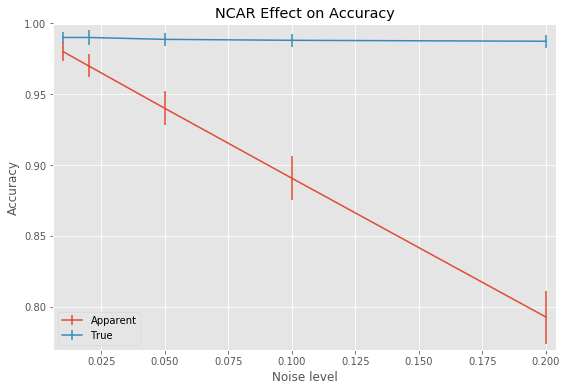

In [92]:
plt.figure(figsize=(9,6))
plt.errorbar(1-np.array(thresholds), accs_ncar[:,1], accs_ncar[:,1] - accs_ncar[:,0], label='Apparent')
plt.errorbar(1-np.array(thresholds), accs_ncar_true[:,1], accs_ncar_true[:,1] - accs_ncar_true[:,0], label='True')
plt.title('NCAR Effect on Accuracy')
plt.xlabel('Noise level')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.margins(0.02)
plt.show()

Label noise that occurs _at random_ (NAR).

In [67]:
acc_nar, acc_nar_true = [], []
threshold = 0.9
rate_0 = 0.75
rate_1 = 0.25
threshold_0 = 1 - (((1-threshold)*y.shape[0]*rate_0)/(y==0).sum())
threshold_1 = 1 - (((1-threshold)*y.shape[0]*rate_1)/(y==1).sum())
y_nar = np.copy(y)
probs = np.random.uniform(size=y.shape)
for i, prob in enumerate(probs):
    if (y_nar[i] == 0) & (prob > threshold_0):
        count_0 += 1
        y_nar[i] = 1
    elif (y_nar[i] == 1) & (prob > threshold_1):
        count_1 += 1
        y_nar[i] = 0
    else:
        pass

In [68]:
idx = y != y_nar

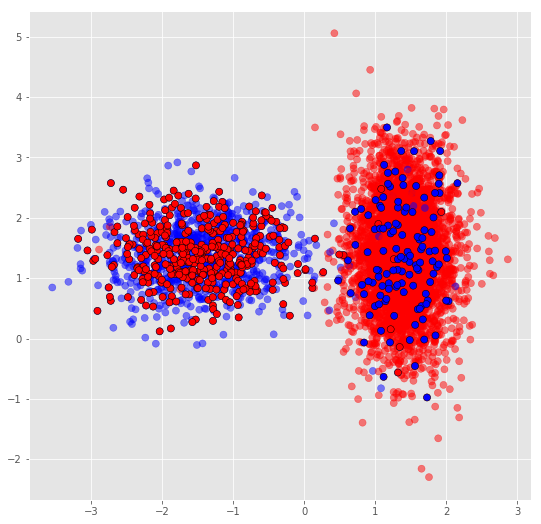

In [69]:
plt.figure(figsize=(9,9))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.5, s=50)
plt.scatter(X[idx,0], X[idx,1], c=y_nar[idx], cmap='bwr', s=50, edgecolors='black')
plt.show()

In [70]:
acc_nar, acc_nar_true = [], []
threshold = 0.9
rate_0 = 0.75
rate_1 = 0.25
threshold_0 = 1 - (((1-threshold)*y.shape[0]*rate_0)/(y==0).sum())
threshold_1 = 1 - (((1-threshold)*y.shape[0]*rate_1)/(y==1).sum())
for i in tqdm(range(10000)):
    # Generate random labels
    y_nar = np.copy(y)
    probs = np.random.uniform(size=y.shape)
    for i, prob in enumerate(probs):
        if (y_nar[i] == 0) & (prob > threshold_0):
            count_0 += 1
            y_nar[i] = 1
        elif (y_nar[i] == 1) & (prob > threshold_1):
            count_1 += 1
            y_nar[i] = 0
        else:
            pass
    # Random train/test split
    idx_train, idx_test = train_test_split(np.arange(y.shape[0]), test_size=0.3, stratify=y_nar, random_state=i)
    # Train model
    clf = LogisticRegression().fit(X[idx_train], y_nar[idx_train])
    # Generate predictions and calculate performance
    y_pred = clf.predict(X[idx_test])
    acc_nar.append(np.mean(y_nar[idx_test] == y_pred))
    acc_nar_true.append(np.mean(y[idx_test] == y_pred))
acc_nar = np.array(acc_nar)
acc_nar_true = np.array(acc_nar_true)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 191.63it/s]


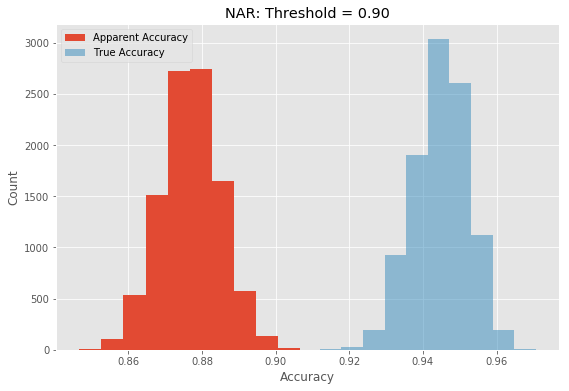

In [72]:
plt.figure(figsize=(9,6))
plt.hist(acc_nar, label='Apparent Accuracy')
plt.hist(acc_nar_true, label='True Accuracy', alpha=0.5)
plt.title('NAR: Threshold = %0.2f' % threshold)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

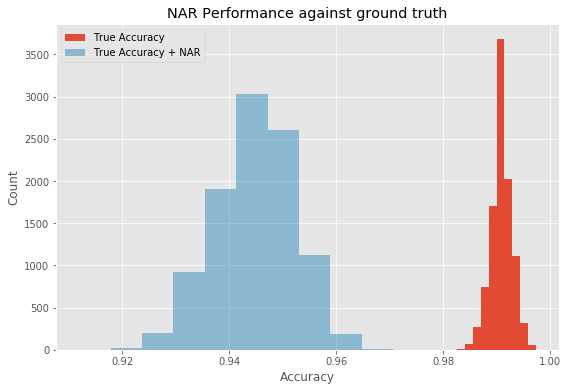

In [73]:
plt.figure(figsize=(9,6))
plt.hist(acc, label='True Accuracy')
plt.hist(acc_nar_true, label='True Accuracy + NAR', alpha=0.5)
plt.title('NAR Performance against ground truth')
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

Try different thresholds.

In [87]:
accs_nar = []
accs_nar_true = []
thresholds = [0.8, 0.9, 0.95, 0.98, 0.99]
for threshold in thresholds:
    print('Threshold = %0.2f' % threshold)
    acc_nar, acc_nar_true = [], []
    rate_0 = 0.75
    rate_1 = 0.25
    threshold_0 = 1 - (((1-threshold)*y.shape[0]*rate_0)/(y==0).sum())
    threshold_1 = 1 - (((1-threshold)*y.shape[0]*rate_1)/(y==1).sum())
    for i in tqdm(range(10000)):
        # Generate random labels
        y_nar = np.copy(y)
        probs = np.random.uniform(size=y.shape)
        for i, prob in enumerate(probs):
            if (y_nar[i] == 0) & (prob > threshold_0):
                count_0 += 1
                y_nar[i] = 1
            elif (y_nar[i] == 1) & (prob > threshold_1):
                count_1 += 1
                y_nar[i] = 0
            else:
                pass
        # Random train/test split
        idx_train, idx_test = train_test_split(np.arange(y.shape[0]), test_size=0.3, stratify=y_nar, random_state=i)
        # Train model
        clf = LogisticRegression().fit(X[idx_train], y_nar[idx_train])
        # Generate predictions and calculate performance
        y_pred = clf.predict(X[idx_test])
        acc_nar.append(np.mean(y_nar[idx_test] == y_pred))
        acc_nar_true.append(np.mean(y[idx_test] == y_pred))
    accs_nar.append(np.percentile(acc_nar, [2.5, 50.0, 97.5]))
    accs_nar_true.append(np.percentile(acc_nar_true, [2.5, 50.0, 97.5]))
accs_nar = np.array(accs_nar)
accs_nar_true = np.array(accs_nar_true)

Threshold = 0.80


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:50<00:00, 197.57it/s]


Threshold = 0.90


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:51<00:00, 193.93it/s]


Threshold = 0.95


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 191.55it/s]


Threshold = 0.98


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 188.84it/s]


Threshold = 0.99


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 189.45it/s]


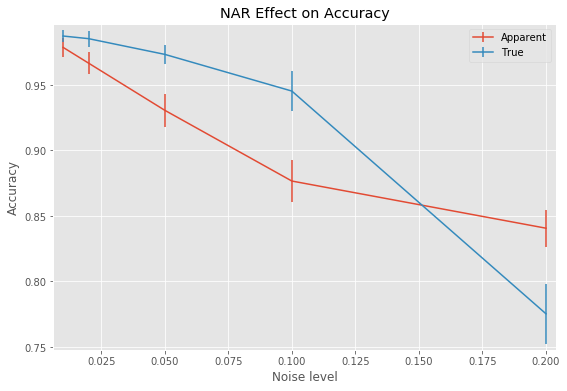

In [89]:
plt.figure(figsize=(9,6))
plt.errorbar(1-np.array(thresholds), accs_nar[:,1], accs_nar[:,1] - accs_nar[:,0], label='Apparent')
plt.errorbar(1-np.array(thresholds), accs_nar_true[:,1], accs_nar_true[:,1] - accs_nar_true[:,0], label='True')
plt.title('NAR Effect on Accuracy')
plt.xlabel('Noise level')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.margins(0.02)
plt.show()

Label noise _not at random_.